In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [130]:
def plot_humans():
      df.plot(kind='scatter',
              x='Height',
              y='Weight',
              title='Weight and Height in adults')

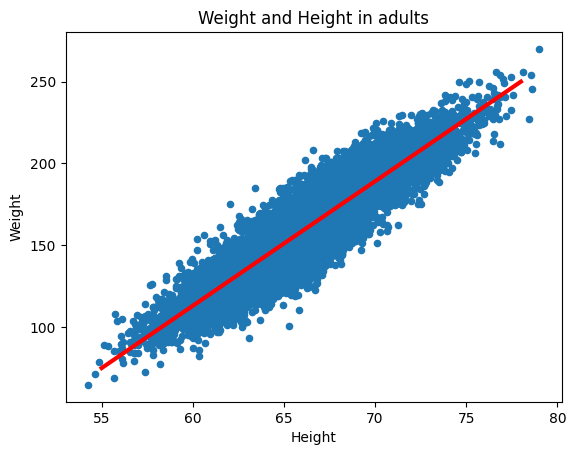

In [131]:
plot_humans()
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [132]:
def line(x, w=0, b=0):
      return x * w + b

In [133]:
x = np.linspace(55, 80, 100)

In [134]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [135]:
yhat = line(x, w=0, b=0)

In [136]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

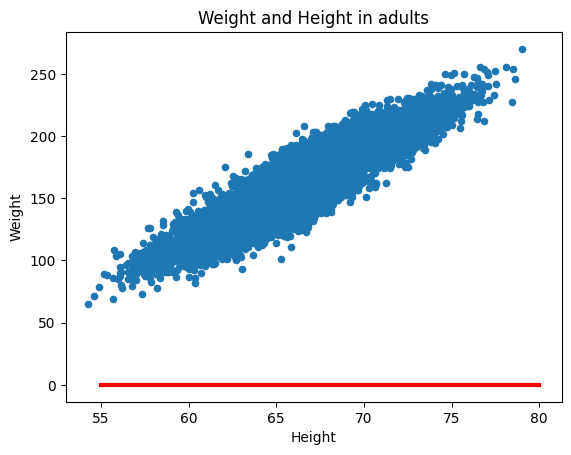

In [137]:
plot_humans()
plt.plot(x, yhat, color='red', linewidth=3)

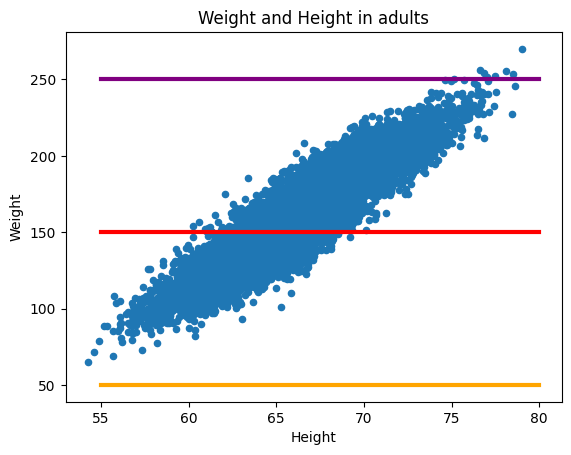

In [138]:
plot_humans()
  # three settings for b "offset" the
plt.plot(x, line(x, b=50), color='orange', linewidth=3)
plt.plot(x, line(x, b=150), color='red', linewidth=3)
plt.plot(x, line(x, b=250), color='purple', linewidth=3)

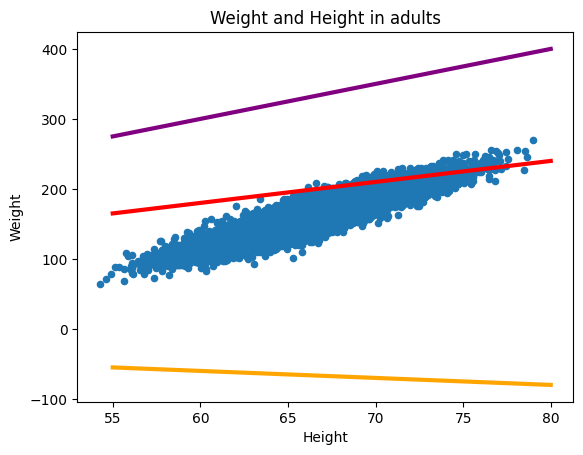

In [139]:
plot_humans()
plt.plot(x, line(x, w=5), color='purple', linewidth=3)
plt.plot(x, line(x, w=3), color='red', linewidth=3)
plt.plot(x, line(x, w=-1), color='orange', linewidth=3)


In [140]:
def mean_squared_error(y_true, y_pred):
      s = (y_true - y_pred)**2
      return s.mean()

In [141]:
X = df[['Height']].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [142]:
X.shape

(10000, 1)

In [143]:
y_true = df['Weight'].values
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [144]:
y_pred = line(X)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [145]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

In [146]:
y_pred.shape

(10000, 1)

In [147]:
y_pred.ravel().shape

(10000,)

In [148]:
y_true.shape

(10000,)

In [149]:
y_pred = line(X, w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.122450478641

In [150]:
y_pred = line(X, w=2, b=20)
mean_squared_error(y_true, y_pred.ravel())

708.9129575511095

Text(0.5, 0, 'b')

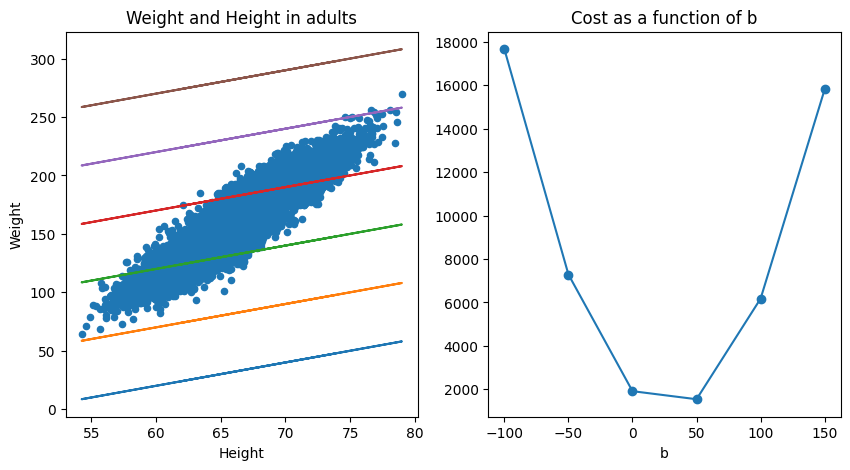

In [151]:
plt.figure(figsize=(10, 5))
# we are going to draw 2 plots in the same figure # first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
    x='Height',
    y='Weight',
    title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = [] # we will append the values of the cost here, for each line for b in bbs:
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [152]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [193]:
model = Sequential()

In [194]:
model.add(keras.Input(shape=(1,), name="input"))
model.add(Dense(1, name="hidden"))

In [160]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [161]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [162]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3579.6338
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 569.4312
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 528.1470
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 513.0627
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 444.0438
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 433.1085
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 380.9994
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 335.2172
Epoch 9/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 312.0818
Epoch 10/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 282.8981
Epoch 11/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 277.6791
Epoch 12/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 248.9951
Epoch 13/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 256.9134
Epoch 14/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 221.7538
Epoch 15/40
313/313 ━━━━━━━━

In [163]:
y_pred = model.predict(X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


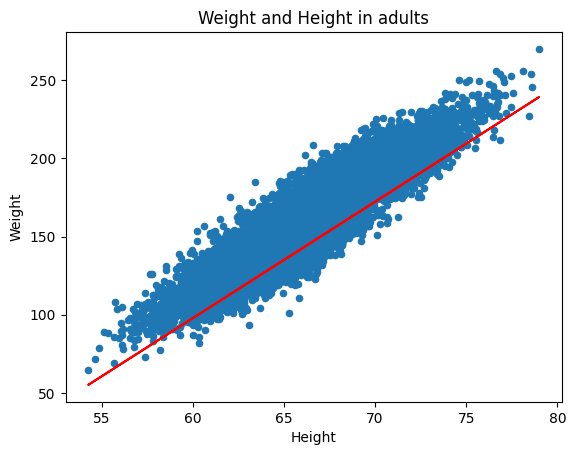

In [164]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [165]:
W, B = model.get_weights()

In [166]:
W

array([[7.4424543]], dtype=float32)

In [167]:
B

array([-348.72067], dtype=float32)

In [168]:
w = W[0, 0]

In [169]:
b = B[0]

In [170]:
-b/w

46.855602

In [171]:
from sklearn.metrics import r2_score

In [172]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.599


In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [175]:
len(X_train)

8000

In [176]:
len(X_test)

2000

In [192]:
model.fit(X_train, y_train, epochs=50, verbose=0)

ValueError: You must call `compile()` before using the model.

In [178]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


In [179]:
from sklearn.metrics import mean_squared_error as mse

In [180]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train,
  y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test,
  y_test_pred)))

The Mean Squared Error on the Train set is:	160.1
The Mean Squared Error on the Test set is:	168.4


In [181]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train,
  y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test,
  y_test_pred)))

The R2 score on the Train set is:	0.845
The R2 score on the Test set is:	0.837


In [182]:
df = pd.read_csv('./data/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


<Axes: xlabel='Time (min)', ylabel='Buy'>

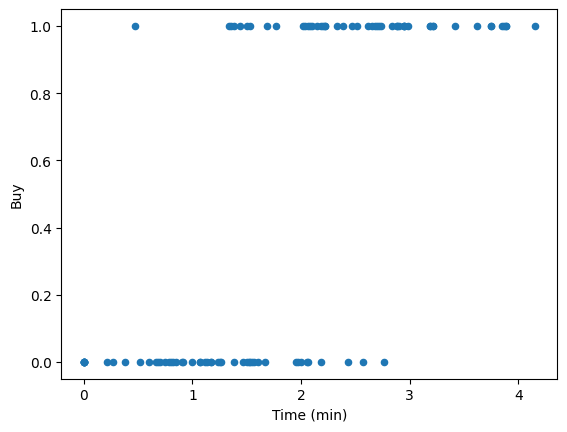

In [183]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [184]:
X = df[['Time (min)']].values
y = df['Buy'].values

In [185]:
model.fit(X, y, epochs=100, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(0.5, 1.0, 'Zoom In')

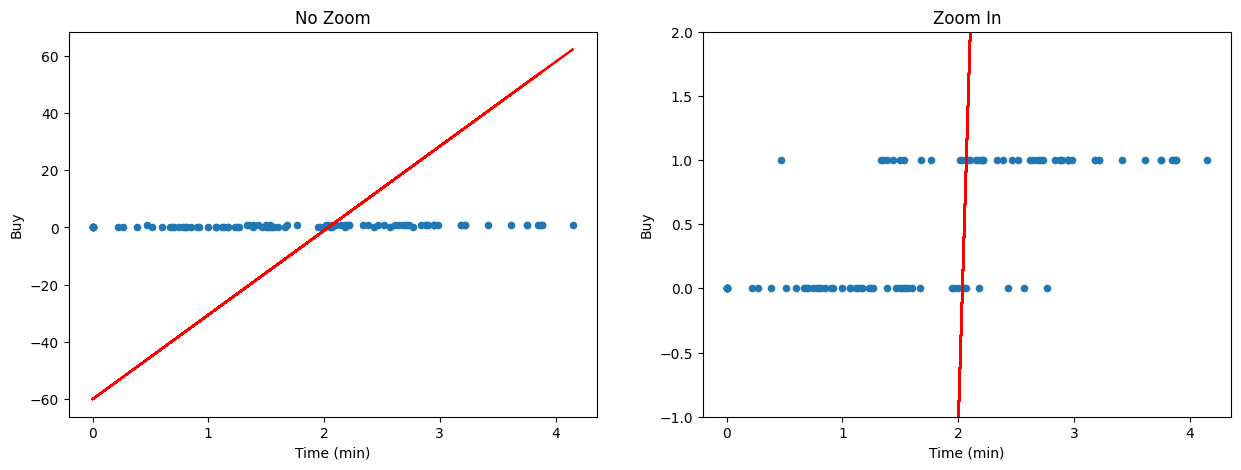

In [186]:
y_pred = model.predict(X)

plt.figure(figsize=(15, 5))
ax = plt.subplot(121)
df.plot(kind='scatter', x='Time (min)', y='Buy', ax=ax)
plt.plot(X, y_pred, color='red')
plt.title('No Zoom')

ax = plt.subplot(122)
df.plot(kind='scatter', x='Time (min)', y='Buy', ax=ax)
plt.plot(X, y_pred, color='red')
plt.ylim((-1,2))
plt.title('Zoom In')


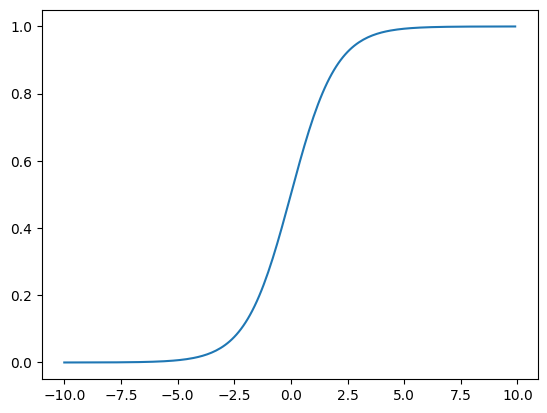

In [187]:
def sigmoid(z):
      return 1.0/(1.0 + np.exp(-z))
z = np.arange(-10, 10, 0.1)
plt.plot(z, sigmoid(z))

Text(0.5, 1.0, 'Changing b')

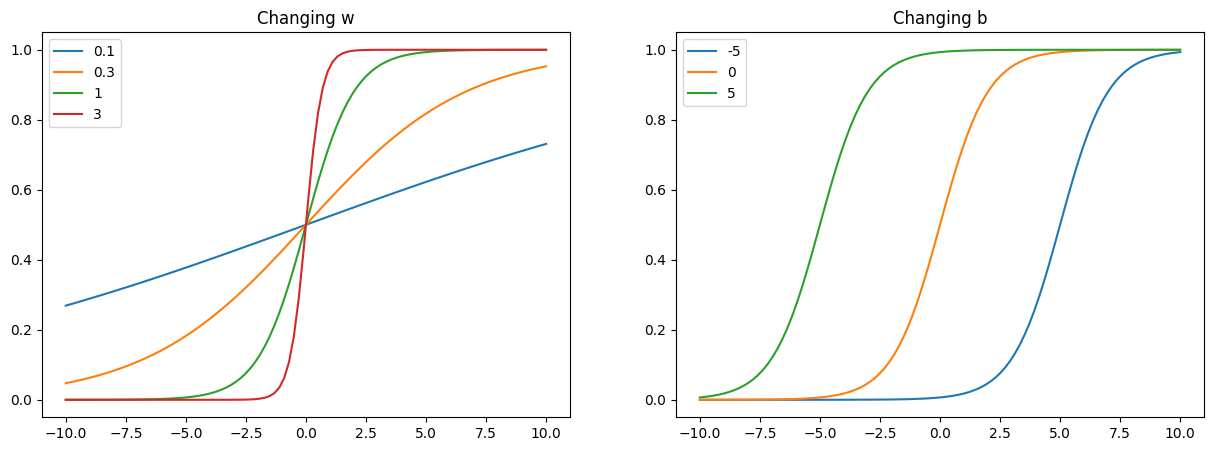

In [188]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 5))
plt.subplot(121)

ws = [0.1, 0.3, 1, 3]
for w in ws:
    plt.plot(x, sigmoid(line(x, w=w)))

plt.legend(ws)
plt.title('Changing w')
  
plt.subplot(122)
bs = [-5, 0, 5]
for b in bs:
    plt.plot(x, sigmoid(line(x, w=1, b=b)))

plt.legend(bs)
plt.title('Changing b')

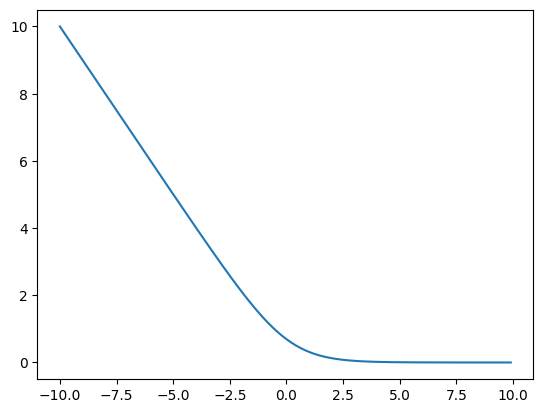

In [189]:
plt.plot(z, -np.log(sigmoid(z)))

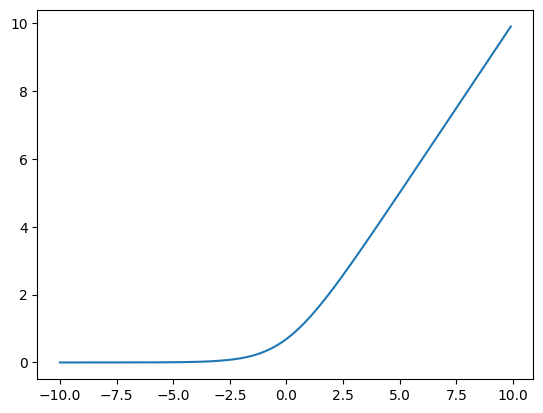

In [190]:
plt.plot(z, -np.log(1 - sigmoid(z)))

In [191]:
model = Sequential()
model.add(keras.Input(shape=(1)))
model.add(Dense(1))

ValueError: Cannot convert '1' to a shape.

In [ ]:
from keras.layers import Activation

In [ ]:
model.add(Activation('sigmoid'))
model.summary()

In [ ]:
plt.plot(z, model.predict(z))

In [ ]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=25)

In [ ]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
               title='Purchase behavior VS time spent on site')
temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [ ]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
params = model.get_weights()
params

In [ ]:
params = [np.zeros(w.shape) for w in params]
params

In [ ]:
model.set_weights(params)

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X)
  > 0.5)))

In [ ]:
plt.plot(z, model.predict(z))

In [ ]:
model.fit(X_train, y_train, epochs=25)

In [ ]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train,
  model.predict(X_train) > 0.5)))

In [ ]:
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test,
  model.predict(X_test) > 0.5)))

In [ ]:
def build_logistic_regression_model():
      model = Sequential()
      model.add(Dense(1, input_dim=1, activation='sigmoid'))
      model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
      return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=25, verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)
scores

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
      cm = confusion_matrix(y_true, y_pred)
      pred_labels = ['Predicted '+ l for l in labels]
      df = pd.DataFrame(cm, index=labels, columns=pred_labels)
      return df

In [ ]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y, y_class_pred))


In [ ]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

In [ ]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

In [ ]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0
df.describe().round(2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)